<h1>Bike Sharing System</h1>

<H3>Multiple Linear Regression</h3>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal: You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

day.csv have the following fields:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

<h3>Importing Libraries</h3>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<h2>Reading & Understanding Data</h2>

In [6]:
df_bike = pd.read_csv('day.csv')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df_bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [22]:
df_bike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [26]:
df_bike.shape

(730, 16)

In [28]:
df_bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [30]:
# dteday is object we should change datatype in datetime

In [11]:
df_bike['dteday'] = pd.to_datetime(df_bike['dteday'],format='%d-%m-%Y', errors='coerce')

In [36]:
df_bike.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [38]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [40]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [42]:
# casual and registered columns should dropped not features as cnt replace both

In [13]:
del df_bike['casual']

In [15]:
del df_bike['registered']

In [52]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [54]:
df_bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


<h1>Missing Value and Outlier Check</h1>

In [57]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [59]:
# No missing values in Dataset

In [61]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


<Axes: ylabel='cnt'>

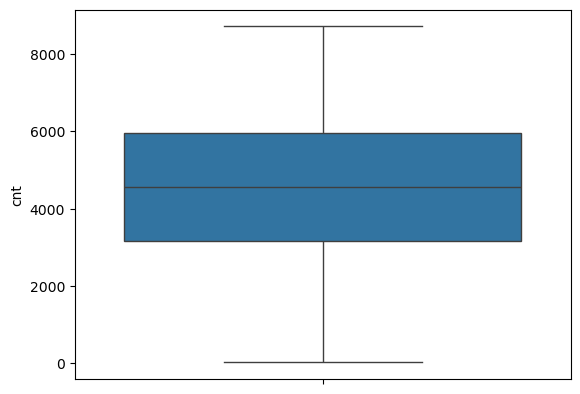

In [63]:
sns.boxplot(df_bike['cnt'])

<Axes: ylabel='temp'>

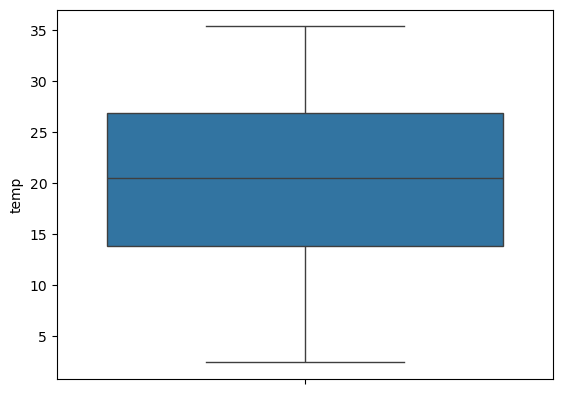

In [65]:
sns.boxplot(df_bike['temp'])

<Axes: ylabel='atemp'>

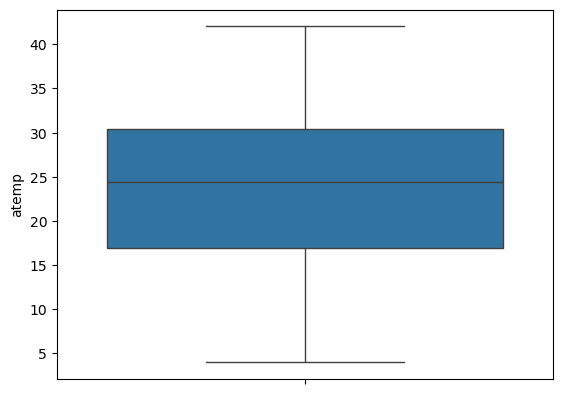

In [67]:
sns.boxplot(df_bike['atemp'])

<Axes: ylabel='hum'>

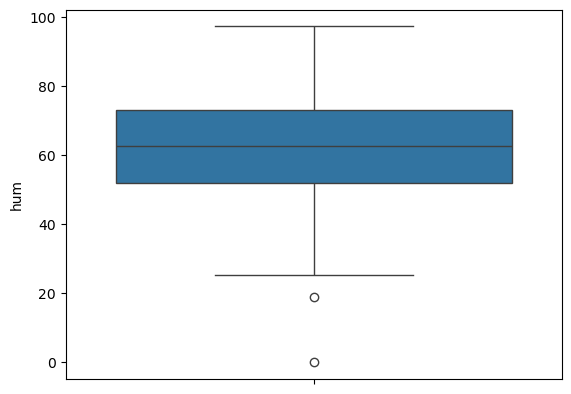

In [69]:
sns.boxplot(df_bike['hum'])

<Axes: ylabel='windspeed'>

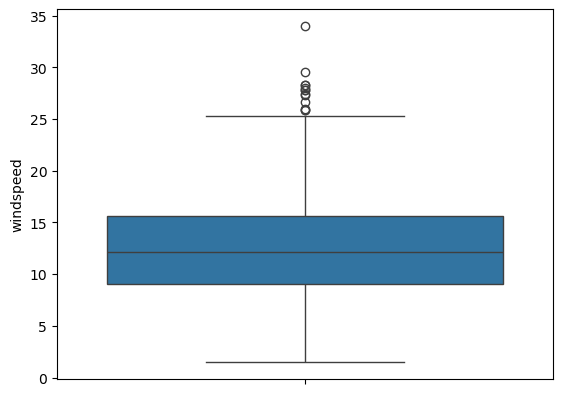

In [71]:
sns.boxplot(df_bike['windspeed'])

In [73]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [89]:
df_bike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [91]:
# Categorical Variable ready for creating dummy varriable

In [17]:
season_mapping = {1:'spring',2:'summer',3:'fall',4:'winter'}  

In [19]:
df_bike['season'] = df_bike['season'].map(season_mapping)

In [21]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
month_mapping = {1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'Sep',10:'Oct',11:'Nov',12:'Dec'} 

In [25]:
df_bike['mnth'] = df_bike['mnth'].map(month_mapping)

In [111]:
df_bike.tail(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,726,2019-12-27,spring,1,Dec,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,727,2019-12-28,spring,1,Dec,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,728,2019-12-29,spring,1,Dec,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,729,2019-12-30,spring,1,Dec,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796
729,730,2019-12-31,spring,1,Dec,0,1,1,2,8.849153,11.17435,57.7500,10.374682,2729


In [27]:
weekday_mapping = {0:'Mon',1:'Tues',2:'Wed',3:'Thur',4:'Friday',5:'Sat',6:'Sun'}

In [29]:
df_bike['weekday'] = df_bike['weekday'].map(weekday_mapping)

In [129]:
df_bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,726,2019-12-27,spring,1,Dec,0,Friday,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,727,2019-12-28,spring,1,Dec,0,Sat,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,728,2019-12-29,spring,1,Dec,0,Sun,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,729,2019-12-30,spring,1,Dec,0,Mon,0,Clear,10.489153,11.58500,48.3333,23.500518,1796
729,730,2019-12-31,spring,1,Dec,0,Tues,1,Cloudy,8.849153,11.17435,57.7500,10.374682,2729


In [121]:
df_bike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [31]:
weathersit_mapping = {1:'Clear',2:'Cloudy',3:'LightSnowRain'}

In [33]:
df_bike['weathersit'] = df_bike['weathersit'].map(weathersit_mapping)

In [35]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,spring,0,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,spring,0,Jan,0,Thur,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


<h1>Exploratory Data Analysis</h1>

<Axes: xlabel='dteday'>

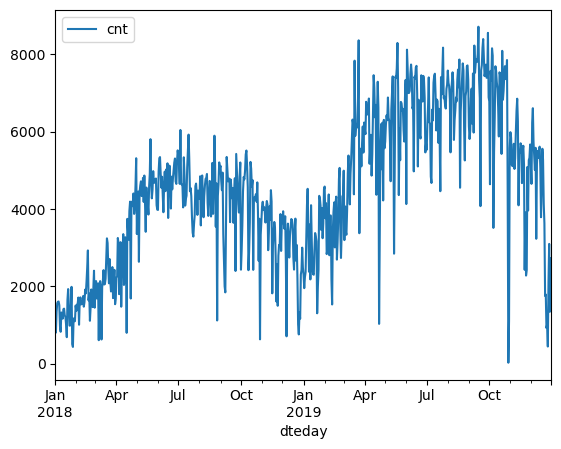

In [37]:
# Date v/s cnt
df_bike.plot.line(x ='dteday',y='cnt')

<Axes: xlabel='weekday', ylabel='cnt'>

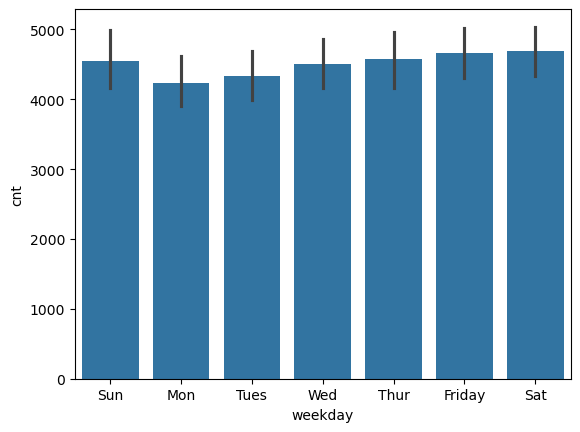

In [39]:
#weekday vs cnt
sns.barplot(data = df_bike,x='weekday',y='cnt')

<Axes: xlabel='temp', ylabel='cnt'>

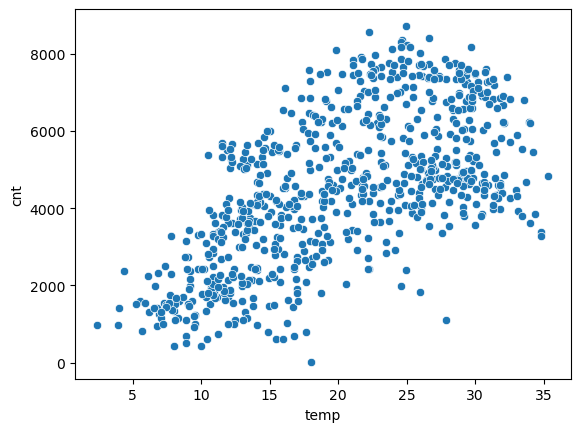

In [41]:
# Temperature vs cnt
sns.scatterplot(data=df_bike,x='temp',y='cnt')

In [43]:
#temp increases then cnt(rental bike) also increases

In [45]:
# atemp vs cnt

<Axes: xlabel='atemp', ylabel='cnt'>

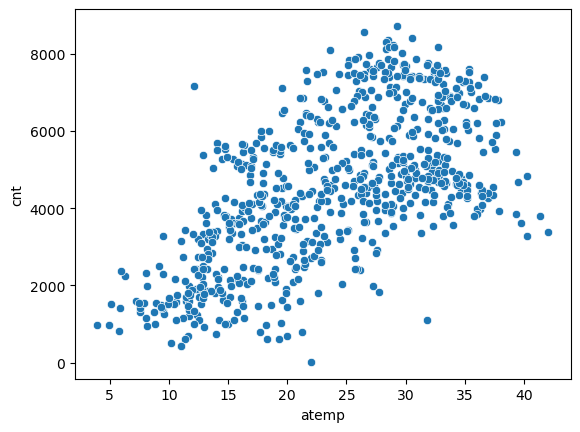

In [47]:
sns.scatterplot(data = df_bike,x='atemp',y='cnt')

In [49]:
#humidity vs cnt

<Axes: xlabel='hum', ylabel='cnt'>

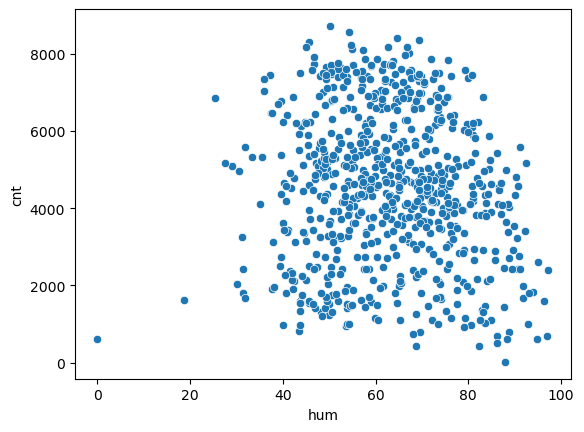

In [53]:
sns.scatterplot(data = df_bike,x='hum',y='cnt')

In [55]:
#Higher humidity levels may slightly reduce bike rentals, but the relationship is weak and influenced by other factors.

In [57]:
# windspeed vs cnt

<Axes: xlabel='windspeed', ylabel='cnt'>

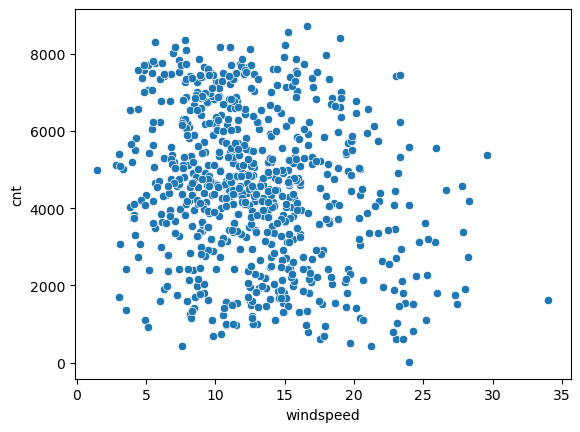

In [61]:
sns.scatterplot(data=df_bike,x='windspeed',y='cnt')

In [63]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,spring,0,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,spring,0,Jan,0,Thur,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [65]:
df_bike_corr = df_bike[['cnt','temp','atemp','hum','windspeed']].corr()
df_bike_corr

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


<Axes: >

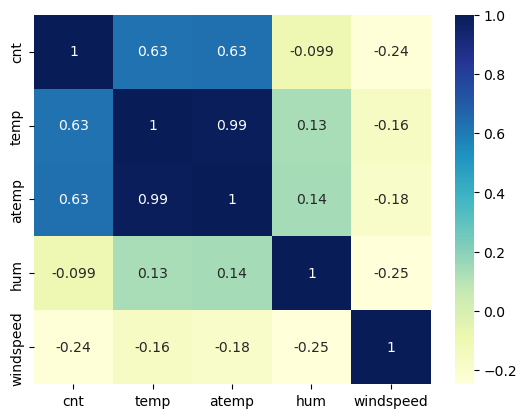

In [67]:
sns.heatmap(df_bike_corr,annot=True,cmap="YlGnBu")

In [69]:
#Positive co-relation between temp-cnt and atemp-cnt while windspeed and hum had negative co-relation

In [71]:
#Season vs cnt

<Axes: xlabel='season', ylabel='cnt'>

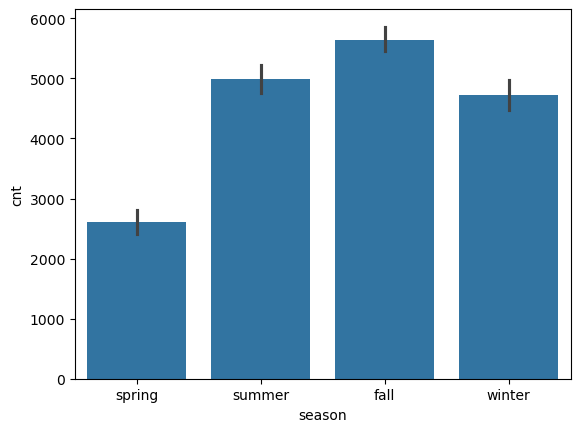

In [75]:
sns.barplot(data = df_bike,x='season',y='cnt')

In [77]:
# year vs cnt

<Axes: xlabel='yr', ylabel='cnt'>

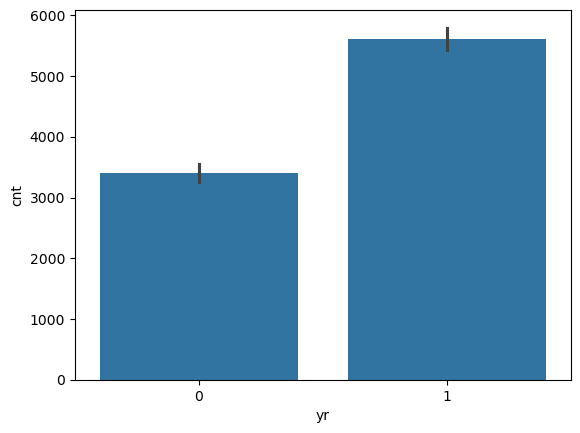

In [79]:
sns.barplot(data=df_bike,x='yr',y='cnt')

In [81]:
#month vs cnt

<Axes: xlabel='mnth', ylabel='cnt'>

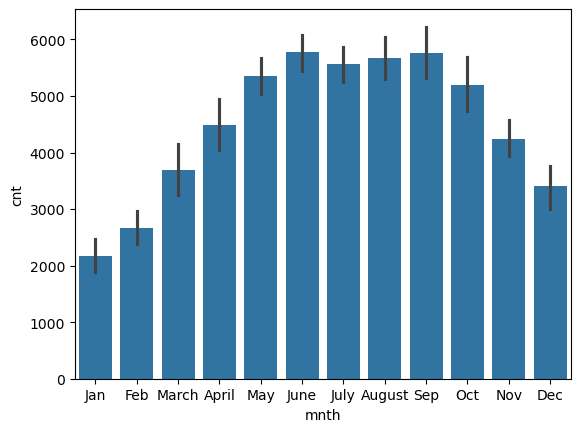

In [83]:
sns.barplot(data = df_bike , x='mnth',y='cnt')

In [85]:
# In the mid of year cnt is high

In [87]:
#weekday vs cnt

<Axes: xlabel='weekday', ylabel='cnt'>

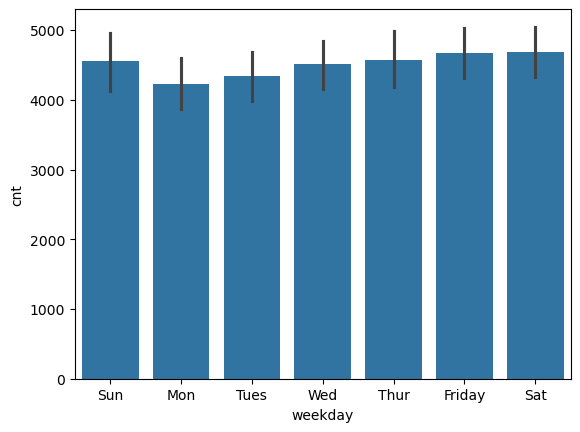

In [89]:
sns.barplot(data = df_bike,x='weekday',y='cnt')

In [91]:
#workingday vs cnt

<Axes: xlabel='workingday', ylabel='cnt'>

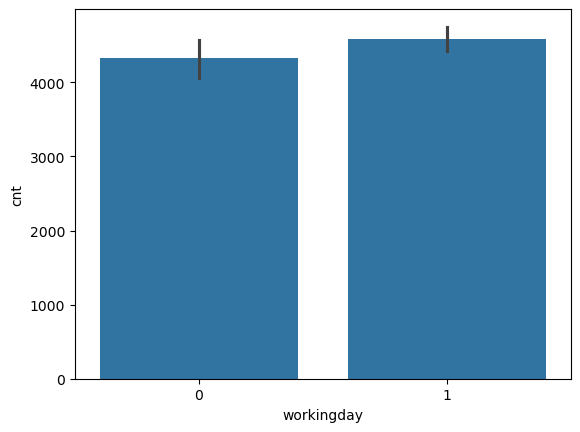

In [93]:
sns.barplot(data = df_bike,x='workingday',y='cnt')

In [95]:
# In weekend cnt is high

In [97]:
#weathersit vs cnt

<Axes: xlabel='weathersit', ylabel='cnt'>

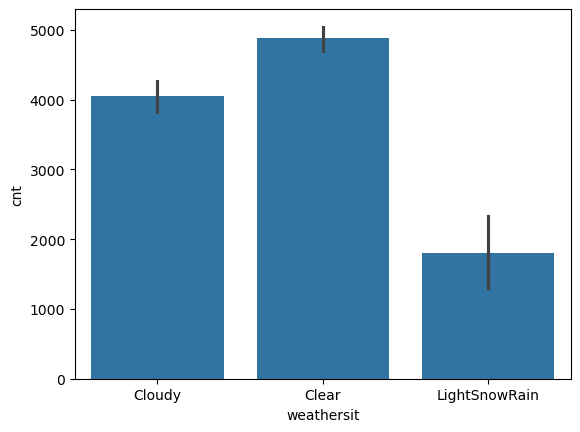

In [99]:
sns.barplot(data = df_bike,x='weathersit',y='cnt')

In [101]:
# in clear weathersit high cnt

<h1>Preparing Data for Modeling</h1>

In [107]:
# Creating Dummy Var for season

In [109]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,spring,0,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,spring,0,Jan,0,Thur,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [111]:
status = pd.get_dummies(df_bike['season']).astype(int)
status

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


In [113]:
#Dropping Redundant Var
status = pd.get_dummies(df_bike['season'],drop_first=True).astype(int)
status

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [115]:
# Concat Dummy df to orignal df
df_bike = pd.concat([df_bike,status],axis=1)
df_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,2018-01-01,spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2,2018-01-02,spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,3,2018-01-03,spring,0,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,4,2018-01-04,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,5,2018-01-05,spring,0,Jan,0,Thur,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,spring,1,Dec,0,Friday,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114,1,0,0
726,727,2019-12-28,spring,1,Dec,0,Sat,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095,1,0,0
727,728,2019-12-29,spring,1,Dec,0,Sun,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341,1,0,0
728,729,2019-12-30,spring,1,Dec,0,Mon,0,Clear,10.489153,11.58500,48.3333,23.500518,1796,1,0,0


In [117]:
# Creating Dummy Var for month

In [149]:
status1 = pd.get_dummies(df_bike['mnth']).astype(int)
status1

,April,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,1,0,0,0,0,0,0,0,0,0
726,0,0,1,0,0,0,0,0,0,0,0,0
727,0,0,1,0,0,0,0,0,0,0,0,0
728,0,0,1,0,0,0,0,0,0,0,0,0


In [151]:
#Dropping Redundant Var
status1 = pd.get_dummies(df_bike['mnth'],drop_first=True).astype(int)
status1

,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [153]:
# Concat Dummy df to orignal df
df_bike = pd.concat([df_bike,status1],axis=1)
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,1,2018-01-01,spring,0,Jan,0,Sun,0,Cloudy,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,2018-01-02,spring,0,Jan,0,Mon,0,Cloudy,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,2018-01-03,spring,0,Jan,0,Tues,1,Clear,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-01-04,spring,0,Jan,0,Wed,1,Clear,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,2018-01-05,spring,0,Jan,0,Thur,1,Clear,9.305237,...,0,0,1,0,0,0,0,0,0,0


In [155]:
# Creating Dummy Var for month weekday

In [157]:
#Dropping Redundant Var
status2 = pd.get_dummies(df_bike['weekday'],drop_first=True).astype(int)
status2

,Mon,Sat,Sun,Thur,Tues,Wed
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


In [159]:
# Concat Dummy df to orignal df
df_bike = pd.concat([df_bike,status2],axis=1)
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed
0,1,2018-01-01,spring,0,Jan,0,Sun,0,Cloudy,14.110847,...,0,0,0,0,0,0,1,0,0,0
1,2,2018-01-02,spring,0,Jan,0,Mon,0,Cloudy,14.902598,...,0,0,0,0,1,0,0,0,0,0
2,3,2018-01-03,spring,0,Jan,0,Tues,1,Clear,8.050924,...,0,0,0,0,0,0,0,0,1,0
3,4,2018-01-04,spring,0,Jan,0,Wed,1,Clear,8.200000,...,0,0,0,0,0,0,0,0,0,1
4,5,2018-01-05,spring,0,Jan,0,Thur,1,Clear,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Creating Dummy Var for weathersit

In [163]:
#Dropping Redundant Var
status3 = pd.get_dummies(df_bike['weathersit'],drop_first=True).astype(int)
status3

,Cloudy,LightSnowRain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [165]:
# Concat Dummy df to orignal df
df_bike = pd.concat([df_bike,status3],axis=1)
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Cloudy,LightSnowRain
0,1,2018-01-01,spring,0,Jan,0,Sun,0,Cloudy,14.110847,...,0,0,0,0,1,0,0,0,1,0
1,2,2018-01-02,spring,0,Jan,0,Mon,0,Cloudy,14.902598,...,0,0,1,0,0,0,0,0,1,0
2,3,2018-01-03,spring,0,Jan,0,Tues,1,Clear,8.050924,...,0,0,0,0,0,0,1,0,0,0
3,4,2018-01-04,spring,0,Jan,0,Wed,1,Clear,8.200000,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-01-05,spring,0,Jan,0,Thur,1,Clear,9.305237,...,0,0,0,0,0,1,0,0,0,0


<h1>Machine Learning</h1>

<h3>Splitting the Data into Training and Testing Sets</h3>

In [169]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

<h3>Rescaling the Features</h3>

In [174]:
#We will use MinMax scaling.

In [176]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [178]:
num_vars = ['temp','atemp','hum','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Cloudy,LightSnowRain
653,654,2019-10-16,winter,1,Oct,0,Wed,1,Clear,0.509887,...,1,0,0,0,0,0,0,1,0,0
576,577,2019-07-31,fall,1,July,0,Wed,1,Clear,0.815169,...,0,0,0,0,0,0,0,1,0,0
426,427,2019-03-03,spring,1,March,0,Sun,0,Cloudy,0.442393,...,0,0,0,0,1,0,0,0,1,0
728,729,2019-12-30,spring,1,Dec,0,Mon,0,Clear,0.245101,...,0,0,1,0,0,0,0,0,0,0
482,483,2019-04-28,summer,1,April,0,Sun,0,Cloudy,0.395666,...,0,0,0,0,1,0,0,0,1,0


<h3>Dividing into X and Y sets for the model building</h3>

In [183]:
y_train = df_train.pop('cnt')
X_train = df_train

<h1>Building our model</h1>

In [188]:
#This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

<h1>RFE</h1>

In [191]:
#Recursive feature elimination

In [203]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [209]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [215]:
X_train.fillna(0, inplace=True)

In [219]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe =RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [199]:
X_train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Cloudy,LightSnowRain
653,654,2019-10-16,winter,1,Oct,0,Wed,1,Clear,0.509887,...,1,0,0,0,0,0,0,1,0,0
576,577,2019-07-31,fall,1,July,0,Wed,1,Clear,0.815169,...,0,0,0,0,0,0,0,1,0,0
426,427,2019-03-03,spring,1,March,0,Sun,0,Cloudy,0.442393,...,0,0,0,0,1,0,0,0,1,0
728,729,2019-12-30,spring,1,Dec,0,Mon,0,Clear,0.245101,...,0,0,1,0,0,0,0,0,0,0
482,483,2019-04-28,summer,1,April,0,Sun,0,Cloudy,0.395666,...,0,0,0,0,1,0,0,0,1,0


In [201]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [211]:
print(X_train.dtypes)

instant            int64
dteday             int64
season           float64
yr                 int64
mnth             float64
holiday            int64
weekday          float64
workingday         int64
weathersit       float64
temp             float64
atemp            float64
hum              float64
windspeed        float64
spring             int32
summer             int32
winter             int32
August             int32
Dec                int32
Feb                int32
Jan                int32
July               int32
June               int32
March              int32
May                int32
Nov                int32
Oct                int32
Sep                int32
Mon                int32
Sat                int32
Sun                int32
Thur               int32
Tues               int32
Wed                int32
Cloudy             int32
LightSnowRain      int32
dtype: object


In [221]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', True, 1),
 ('dteday', True, 1),
 ('season', False, 21),
 ('yr', True, 1),
 ('mnth', False, 20),
 ('holiday', False, 17),
 ('weekday', False, 19),
 ('workingday', False, 11),
 ('weathersit', False, 18),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 10),
 ('windspeed', False, 5),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 7),
 ('June', False, 13),
 ('March', True, 1),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', False, 2),
 ('Mon', False, 16),
 ('Sat', False, 9),
 ('Sun', False, 8),
 ('Thur', False, 12),
 ('Tues', False, 4),
 ('Wed', False, 14),
 ('Cloudy', False, 6),
 ('LightSnowRain', False, 15)]

In [223]:
col = X_train.columns[rfe.support_]
col

Index(['instant', 'dteday', 'yr', 'temp', 'atemp', 'spring', 'summer',
       'winter', 'August', 'Dec', 'Feb', 'Jan', 'March', 'Nov', 'Oct'],
      dtype='object')

<h2>Building model using statsmodel, for the detailed statistics</h2>

In [236]:
X_train = X_train.drop(columns=["dteday"])

In [245]:
X_train

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Oct,Sep,Mon,Sat,Sun,Thur,Tues,Wed,Cloudy,LightSnowRain
653,654,0.0,1,0.0,0,0.0,1,0.0,0.509887,0.501133,...,1,0,0,0,0,0,0,1,0,0
576,577,0.0,1,0.0,0,0.0,1,0.0,0.815169,0.766351,...,0,0,0,0,0,0,0,1,0,0
426,427,0.0,1,0.0,0,0.0,0,0.0,0.442393,0.438975,...,0,0,0,0,1,0,0,0,1,0
728,729,0.0,1,0.0,0,0.0,0,0.0,0.245101,0.200348,...,0,0,1,0,0,0,0,0,0,0
482,483,0.0,1,0.0,0,0.0,0,0.0,0.395666,0.391735,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,527,0.0,1,0.0,0,0.0,1,0.0,0.824514,0.762183,...,0,0,0,0,0,0,1,0,1,0
578,579,0.0,1,0.0,0,0.0,1,0.0,0.863973,0.824359,...,0,0,0,0,0,0,0,0,0,0
53,54,0.0,0,0.0,0,0.0,1,0.0,0.202618,0.218747,...,0,0,0,0,0,1,0,0,0,0
350,351,0.0,0,0.0,0,0.0,0,0.0,0.248216,0.223544,...,0,0,0,0,1,0,0,0,1,0


In [249]:
# Creating X_test dataframe with RFE selected variables
col = list(set(col).intersection(X_train.columns))
X_train_rfe1 = X_train[col]

In [251]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe1)

In [253]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [255]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     110.0
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          6.97e-142
Time:                        20:03:00   Log-Likelihood:                -4226.7
No. Observations:                 510   AIC:                             8483.
Df Residuals:                     495   BIC:                             8547.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        637.6546    531.394      1.200      0.2

In [269]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,376.47
0,atemp,350.61
12,instant,154.59
8,yr,59.91
2,winter,10.71
10,spring,9.18
5,Dec,7.25
7,Nov,6.48
6,Oct,5.15
3,Jan,4.35


In [273]:
X_train_new = X_train_rfe1.drop(["temp"], axis = 1)

In [261]:
#Rebuilding the model without temp

In [275]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [277]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [279]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     118.6
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          7.41e-143
Time:                        22:01:36   Log-Likelihood:                -4226.9
No. Observations:                 510   AIC:                             8482.
Df Residuals:                     496   BIC:                             8541.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        690.1263    523.285      1.319      0.1

In [285]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,instant,142.76
8,yr,55.82
0,atemp,19.55
2,winter,10.60
9,spring,9.17
5,Dec,6.89
7,Nov,6.30
6,Oct,5.06
3,Jan,4.34
1,Feb,3.43


In [283]:
X_train_rfe1

,atemp,Feb,winter,Jan,August,Dec,Oct,Nov,yr,temp,spring,summer,instant,March
653,0.501133,0,1,0,0,0,1,0,1,0.509887,0,0,654,0
576,0.766351,0,0,0,0,0,0,0,1,0.815169,0,0,577,0
426,0.438975,0,0,0,0,0,0,0,1,0.442393,1,0,427,1
728,0.200348,0,0,0,0,1,0,0,1,0.245101,1,0,729,0
482,0.391735,0,0,0,0,0,0,0,1,0.395666,0,1,483,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.762183,0,0,0,0,0,0,0,1,0.824514,0,1,527,0
578,0.824359,0,0,0,1,0,0,0,1,0.863973,0,0,579,0
53,0.218747,1,0,0,0,0,0,0,0,0.202618,1,0,54,0
350,0.223544,0,1,0,0,1,0,0,0,0.248216,0,0,351,0


In [299]:
X_train_new1 = X_train_new.drop(["yr"], axis = 1)

In [289]:
#Rebuilding the model without yr

In [301]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [293]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [303]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     118.6
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          7.51e-143
Time:                        22:08:48   Log-Likelihood:                -4226.9
No. Observations:                 510   AIC:                             8482.
Df Residuals:                     496   BIC:                             8541.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.2984    351.618      1.133      0.2

In [305]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,winter,10.23
8,spring,9.15
10,instant,5.29
0,atemp,5.19
7,Nov,4.30
6,Oct,4.21
3,Jan,4.14
5,Dec,3.59
1,Feb,3.34
11,March,2.62


In [471]:
# Removing spring then Model

In [307]:
X_train_new2 = X_train_new1.drop(["spring"], axis = 1)

In [309]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

In [311]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [313]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     140.6
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          6.43e-145
Time:                        22:11:16   Log-Likelihood:                -4227.1
No. Observations:                 510   AIC:                             8478.
Df Residuals:                     498   BIC:                             8529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        427.8732    313.992      1.363      0.1

In [315]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,winter,7.33
9,instant,5.27
0,atemp,5.02
7,Nov,3.54
6,Oct,3.49
5,Dec,2.36
8,summer,1.66
4,August,1.47
10,March,1.10
1,Feb,1.06


In [473]:
# Removing August then Model

In [319]:
X_train_new3 = X_train_new2.drop(["August"], axis = 1)

In [321]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

In [323]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [325]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     155.0
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          5.12e-146
Time:                        22:13:52   Log-Likelihood:                -4227.1
No. Observations:                 510   AIC:                             8476.
Df Residuals:                     499   BIC:                             8523.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.1429    311.195      1.398      0.1

In [327]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,winter,7.24
8,instant,5.23
0,atemp,4.41
6,Nov,3.54
5,Oct,3.48
4,Dec,2.35
7,summer,1.47
9,March,1.08
1,Feb,1.04
3,Jan,1.04


In [475]:
# Removing March then Model

In [331]:
X_train_new4 = X_train_new3.drop(["March"], axis = 1)

In [341]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

In [343]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [345]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     172.5
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          3.90e-147
Time:                        22:37:05   Log-Likelihood:                -4227.2
No. Observations:                 510   AIC:                             8474.
Df Residuals:                     500   BIC:                             8517.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        486.0295    232.790      2.088      0.0

In [347]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,winter,7.24
8,instant,5.21
0,atemp,4.40
6,Nov,3.54
5,Oct,3.48
4,Dec,2.35
7,summer,1.45
1,Feb,1.04
3,Jan,1.04


In [477]:
# Removing Feb then Model

In [349]:
X_train_new5 = X_train_new4.drop(["Feb"], axis = 1)

In [351]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

In [353]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [355]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     193.8
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          4.93e-148
Time:                        22:40:35   Log-Likelihood:                -4227.8
No. Observations:                 510   AIC:                             8474.
Df Residuals:                     501   BIC:                             8512.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        320.0978    176.820      1.810      0.0

In [357]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,winter,7.23
7,instant,5.17
0,atemp,4.39
5,Nov,3.54
4,Oct,3.48
3,Dec,2.34
6,summer,1.44
2,Jan,1.04


In [479]:
# Removing Jan then Model

In [361]:
X_train_new6 = X_train_new5.drop(["Jan"], axis = 1)

In [363]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)

In [365]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [367]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     221.7
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          3.98e-149
Time:                        22:43:27   Log-Likelihood:                -4228.0
No. Observations:                 510   AIC:                             8472.
Df Residuals:                     502   BIC:                             8506.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.5389    135.903      1.799      0.0

<h3>Residual Analysis of the train data</h3>

In [382]:
y_train_cnt = lm.predict(X_train_lm)

In [384]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

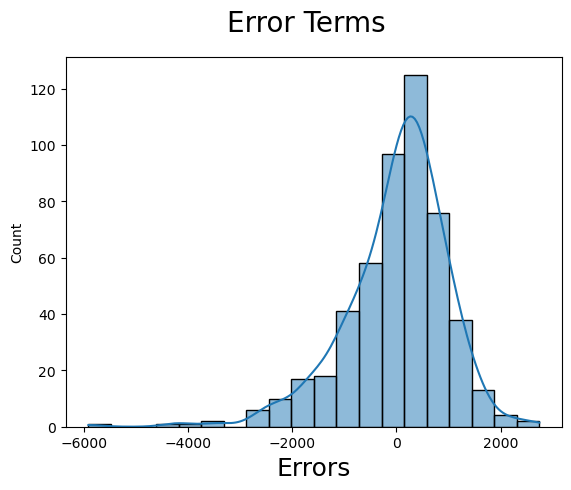

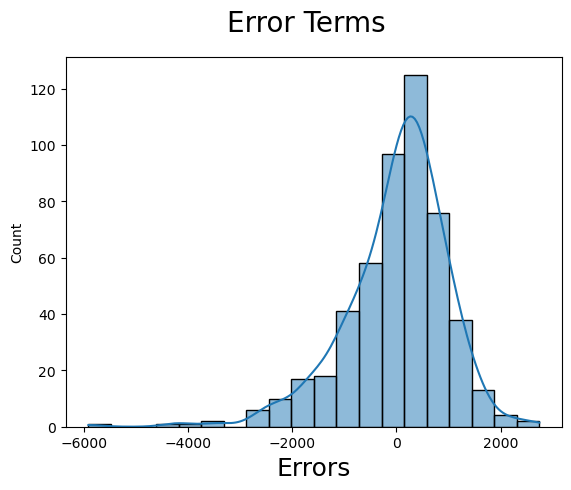

In [396]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_cnt), bins = 20,kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

<h2>Making Predictions</h2>

In [399]:
#Applying the scaling on the test sets

In [417]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [405]:
df_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'August', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'March', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun',
       'Thur', 'Tues', 'Wed', 'Cloudy', 'LightSnowRain'],
      dtype='object')

In [421]:
y_test = df_test.pop('cnt')
X_test = df_test

In [433]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [427]:
selected_features = X_train_new6.columns  # Ensure these are the features used to train `lm`
X_test_new = X_test[selected_features]

In [451]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [453]:
y_pred

184    1061.230063
535    3696.553408
299    5679.563252
221    1277.590921
152    1457.949428
          ...     
400    2320.109621
702    7163.523000
127    1310.848185
640    7673.279931
72      404.064276
Length: 219, dtype: float64

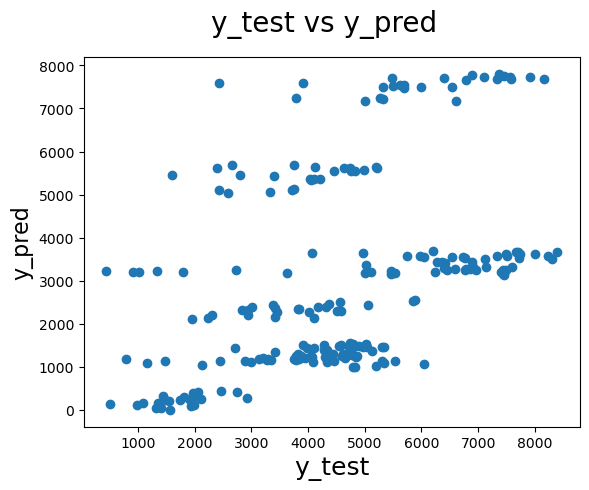

In [469]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()          